In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
cd drive/MyDrive/AI Project

/content/drive/MyDrive/AI Project


In [4]:
!pip install pillow
!pip install numpy
!pip install tensorflow==1.14.0
!pip install Keras==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 44 kB/s 
     |████████████████████████████████| 3.1 MB 19.3 MB/s 
     |████████████████████████████████| 488 kB 55.3 MB/s 
     |████████████████████████████████| 50 kB 6.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab

apple  파일 길이 :  100
apple  :  ./multi_img_data/imgs_others/train/apple/ap077.png
carrot  파일 길이 :  100
carrot  :  ./multi_img_data/imgs_others/train/carrot/ca004.png
melon  파일 길이 :  100
melon  :  ./multi_img_data/imgs_others/train/melon/me069.png
strawberry  파일 길이 :  100
strawberry  :  ./multi_img_data/imgs_others/train/strawberry/st038.png
tomato  파일 길이 :  100
tomato  :  ./multi_img_data/imgs_others/train/tomato/to092.png
watermelon  파일 길이 :  100
watermelon  :  ./multi_img_data/imgs_others/train/watermelon/wa077.png
600


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 65536)           

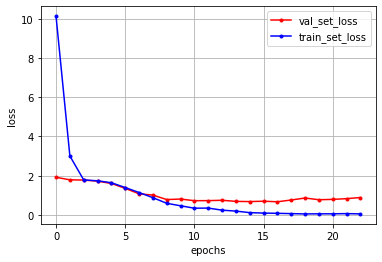

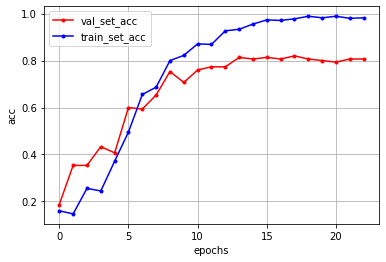

In [19]:
from PIL import Image
import os, glob, numpy as np
from numpy import ndarray as nda
from sklearn.model_selection import train_test_split

class make_model():
    def __init__(self):
        #self.image_rotate()
        self.make_npy_file()
        self.make_model()

    def image_rotate(self):
        caltech_dir = "./multi_img_data/imgs_others/train"
        saving_dir = "./multi_img_data/imgs_others/train_rotated"
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        
        image_w = 128
        image_h = 128

        for idx, cat in enumerate(categories):
            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                white=(255, 255, 255)
                for j in range(-9, 9):
                    img_name=f.split('.')
                    img_name = img_name[1].split("\\")
                    img_ro=img.rotate(20*j, expand=1, fillcolor=white)
                    img_ro=img_ro.crop((img_ro.size[0]/2-image_w/2, img_ro.size[1]/2-image_h/2, img_ro.size[0]/2+image_w/2, img_ro.size[1]/2+image_h/2))
                    save_dir=saving_dir + "/" + cat + "/" + img_name[1]+"_"+str(j+10)+".png"
                    img_ro.save(save_dir)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        print("전처리 완료\n")

    def make_npy_file(self):
        caltech_dir = "./multi_img_data/imgs_others/train"

        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)

        image_w = 128
        image_h = 128

        pixels = image_h * image_w * 3

        X = []
        y = []

        for idx, cat in enumerate(categories):
            # one-hot 돌리기.
            label = [0 for i in range(nb_classes)]
            label[idx] = 1

            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                data=np.asarray(img)
               
                X.append(data)
                y.append(label)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        
        X = np.array(X)
        y = np.array(y)
        # 1 0 0 0 이면 airplanes
        # 0 1 0 0 이면 buddha 이런식

        X_train, X_test, y_train, y_test = train_test_split(X, y)
        xy = (X_train, X_test, y_train, y_test)
        print(len(y))
        np.save("./numpy_data/multi_image_data.npy", xy)

    def make_model(self):
        from keras.models import Sequential
        from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
        from keras.callbacks import EarlyStopping, ModelCheckpoint
        import matplotlib.pyplot as plt
        import keras.backend.tensorflow_backend as K
        import tensorflow as tf

        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
        session = tf.compat.v1.Session(config=config)

        X_train, X_test, y_train, y_test = np.load("./numpy_data/multi_image_data.npy", allow_pickle=True)
        
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)
        X_train = X_train.astype(float) / 255
        X_test = X_test.astype(float) / 255

        with K.tf_ops.device('/device:CPU:0'):
            model = Sequential()
            model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:],
                             activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Flatten())
            model.add(Dense(256, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Dense(nb_classes, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            model_dir = './model'

            if not os.path.exists(model_dir):
                os.mkdir(model_dir)

            model_path = model_dir + '/multi_img_classification.model'
            checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                         verbose=1, save_best_only=True)
            early_stopping = EarlyStopping(monitor='val_loss', patience=6)

        model.summary()

        history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

        print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))


        y_vloss = history.history['val_loss']
        y_loss = history.history['loss']
        
        y_vacc = history.history['val_acc']
        y_acc = history.history['acc']

        x_len = np.arange(len(y_loss))

        plt.figure(1)
        plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
        plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid()
        
        plt.figure(2)
        plt.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
        plt.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('acc')
        plt.grid()
        
        plt.show()
        
if __name__ == '__main__':
    w = make_model()


apple  파일 길이 :  100
apple  :  ./multi_img_data/imgs_others/train/apple/ap077.png
carrot  파일 길이 :  100
carrot  :  ./multi_img_data/imgs_others/train/carrot/ca004.png
melon  파일 길이 :  100
melon  :  ./multi_img_data/imgs_others/train/melon/me069.png
strawberry  파일 길이 :  100
strawberry  :  ./multi_img_data/imgs_others/train/strawberry/st038.png
tomato  파일 길이 :  100
tomato  :  ./multi_img_data/imgs_others/train/tomato/to092.png
watermelon  파일 길이 :  100
watermelon  :  ./multi_img_data/imgs_others/train/watermelon/wa077.png
600


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 65536)            

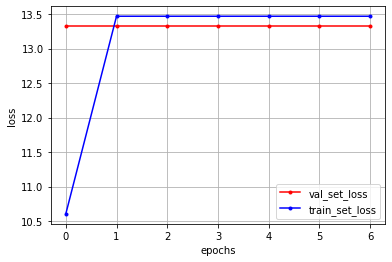

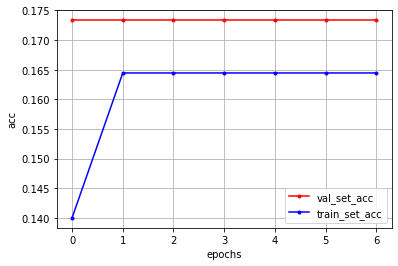

In [18]:
from PIL import Image
import os, glob, numpy as np
from numpy import ndarray as nda
from sklearn.model_selection import train_test_split

class make_model():
    def __init__(self):
        #self.image_rotate()
        self.make_npy_file()
        self.make_model()

    def image_rotate(self):
        caltech_dir = "./multi_img_data/imgs_others/train"
        saving_dir = "./multi_img_data/imgs_others/train_rotated"
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        
        image_w = 128
        image_h = 128

        for idx, cat in enumerate(categories):
            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                white=(255, 255, 255)
                for j in range(-9, 9):
                    img_name=f.split('.')
                    img_name = img_name[1].split("\\")
                    img_ro=img.rotate(20*j, expand=1, fillcolor=white)
                    img_ro=img_ro.crop((img_ro.size[0]/2-image_w/2, img_ro.size[1]/2-image_h/2, img_ro.size[0]/2+image_w/2, img_ro.size[1]/2+image_h/2))
                    save_dir=saving_dir + "/" + cat + "/" + img_name[1]+"_"+str(j+10)+".png"
                    img_ro.save(save_dir)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        print("전처리 완료\n")

    def make_npy_file(self):
        caltech_dir = "./multi_img_data/imgs_others/train"

        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)

        image_w = 128
        image_h = 128

        pixels = image_h * image_w * 3

        X = []
        y = []

        for idx, cat in enumerate(categories):
            # one-hot 돌리기.
            label = [0 for i in range(nb_classes)]
            label[idx] = 1

            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                data=np.asarray(img)
               
                X.append(data)
                y.append(label)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        
        X = np.array(X)
        y = np.array(y)
        # 1 0 0 0 이면 airplanes
        # 0 1 0 0 이면 buddha 이런식

        X_train, X_test, y_train, y_test = train_test_split(X, y)
        xy = (X_train, X_test, y_train, y_test)
        print(len(y))
        np.save("./numpy_data/multi_image_data.npy", xy)

    def make_model(self):
        from keras.models import Sequential
        from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
        from keras.callbacks import EarlyStopping, ModelCheckpoint
        import matplotlib.pyplot as plt
        import keras.backend.tensorflow_backend as K
        import tensorflow as tf

        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
        session = tf.compat.v1.Session(config=config)

        X_train, X_test, y_train, y_test = np.load("./numpy_data/multi_image_data.npy", allow_pickle=True)
        
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)
        X_train = X_train.astype(float) / 255
        X_test = X_test.astype(float) / 255

        with K.tf_ops.device('/device:CPU:0'):
            model = Sequential()
            model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:],
                             activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Flatten())
            model.add(Dense(256, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Dense(nb_classes, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            model_dir = './model'

            if not os.path.exists(model_dir):
                os.mkdir(model_dir)

            model_path = model_dir + '/multi_img_classification.model'
            checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                         verbose=1, save_best_only=True)
            early_stopping = EarlyStopping(monitor='val_loss', patience=6)

        model.summary()

        history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])
        history_dict = history.history
        print(history_dict.keys())    
        print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))


        y_vloss = history.history['val_loss']
        y_loss = history.history['loss']
        
        y_vacc = history.history['val_acc']
        y_acc = history.history['acc']

        x_len = np.arange(len(y_loss))

        plt.figure(1)
        plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
        plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid()
        
        plt.figure(2)
        plt.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
        plt.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('acc')
        plt.grid()
        
        plt.show()
        
if __name__ == '__main__':
    w = make_model()


apple  파일 길이 :  100
apple  :  ./multi_img_data/imgs_others/train/apple/ap077.png
carrot  파일 길이 :  100
carrot  :  ./multi_img_data/imgs_others/train/carrot/ca004.png
melon  파일 길이 :  100
melon  :  ./multi_img_data/imgs_others/train/melon/me069.png
strawberry  파일 길이 :  100
strawberry  :  ./multi_img_data/imgs_others/train/strawberry/st038.png
tomato  파일 길이 :  100
tomato  :  ./multi_img_data/imgs_others/train/tomato/to092.png
watermelon  파일 길이 :  100
watermelon  :  ./multi_img_data/imgs_others/train/watermelon/wa077.png
600


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 65536)           

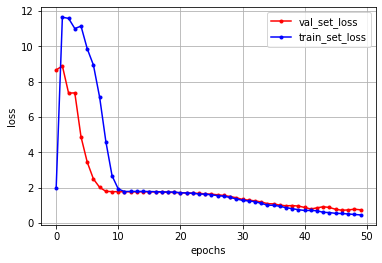

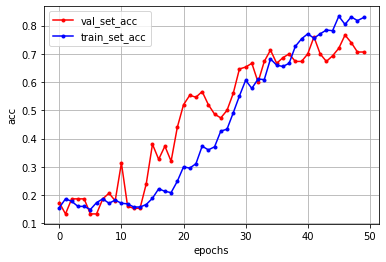

In [20]:
from PIL import Image
import os, glob, numpy as np
from numpy import ndarray as nda
from sklearn.model_selection import train_test_split

class make_model():
    def __init__(self):
        #self.image_rotate()
        self.make_npy_file()
        self.make_model()

    def image_rotate(self):
        caltech_dir = "./multi_img_data/imgs_others/train"
        saving_dir = "./multi_img_data/imgs_others/train_rotated"
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        
        image_w = 128
        image_h = 128

        for idx, cat in enumerate(categories):
            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                white=(255, 255, 255)
                for j in range(-9, 9):
                    img_name=f.split('.')
                    img_name = img_name[1].split("\\")
                    img_ro=img.rotate(20*j, expand=1, fillcolor=white)
                    img_ro=img_ro.crop((img_ro.size[0]/2-image_w/2, img_ro.size[1]/2-image_h/2, img_ro.size[0]/2+image_w/2, img_ro.size[1]/2+image_h/2))
                    save_dir=saving_dir + "/" + cat + "/" + img_name[1]+"_"+str(j+10)+".png"
                    img_ro.save(save_dir)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        print("전처리 완료\n")

    def make_npy_file(self):
        caltech_dir = "./multi_img_data/imgs_others/train"

        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)

        image_w = 128
        image_h = 128

        pixels = image_h * image_w * 3

        X = []
        y = []

        for idx, cat in enumerate(categories):
            # one-hot 돌리기.
            label = [0 for i in range(nb_classes)]
            label[idx] = 1

            image_dir = caltech_dir + "/" + cat
            files = glob.glob(image_dir + "/*.png")
            print(cat, " 파일 길이 : ", len(files))
            for i, f in enumerate(files):
                img = Image.open(f)
                img = img.convert("RGB")
                img = img.resize((image_w, image_h))
                data=np.asarray(img)
               
                X.append(data)
                y.append(label)
                
                if i % 700 == 0:
                    print(cat, " : ", f)
        
        X = np.array(X)
        y = np.array(y)
        # 1 0 0 0 이면 airplanes
        # 0 1 0 0 이면 buddha 이런식

        X_train, X_test, y_train, y_test = train_test_split(X, y)
        xy = (X_train, X_test, y_train, y_test)
        print(len(y))
        np.save("./numpy_data/multi_image_data.npy", xy)

    def make_model(self):
        from keras.models import Sequential
        from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
        from keras.callbacks import EarlyStopping, ModelCheckpoint
        import matplotlib.pyplot as plt
        import keras.backend.tensorflow_backend as K
        import tensorflow as tf

        config = tf.compat.v1.ConfigProto()
        config.gpu_options.allow_growth = True
        session = tf.compat.v1.Session(config=config)

        X_train, X_test, y_train, y_test = np.load("./numpy_data/multi_image_data.npy", allow_pickle=True)
        
        categories = ["apple", "carrot", "melon", "strawberry", "tomato", "watermelon"]
        nb_classes = len(categories)
        X_train = X_train.astype(float) / 255
        X_test = X_test.astype(float) / 255

        with K.tf_ops.device('/device:CPU:0'):
            model = Sequential()
            model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:],
                             activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(0.25))

            model.add(Flatten())
            model.add(Dense(256, activation='relu'))
            model.add(Dropout(0.5))
            model.add(Dense(nb_classes, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            model_dir = './model'

            if not os.path.exists(model_dir):
                os.mkdir(model_dir)

            model_path = model_dir + '/multi_img_classification.model'
            checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                         verbose=1, save_best_only=True)
            early_stopping = EarlyStopping(monitor='val_loss', patience=6)

        model.summary()

        history = model.fit(X_train, y_train, batch_size=512, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

        print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))


        y_vloss = history.history['val_loss']
        y_loss = history.history['loss']
        
        y_vacc = history.history['val_acc']
        y_acc = history.history['acc']

        x_len = np.arange(len(y_loss))

        plt.figure(1)
        plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
        plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid()
        
        plt.figure(2)
        plt.plot(x_len, y_vacc, marker='.', c='red', label='val_set_acc')
        plt.plot(x_len, y_acc, marker='.', c='blue', label='train_set_acc')
        plt.legend()
        plt.xlabel('epochs')
        plt.ylabel('acc')
        plt.grid()
        
        plt.show()
        
if __name__ == '__main__':
    w = make_model()
